In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import zscore

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../../data/benin-malanville.csv')
df.sample(10)

Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
91317   2021-10-11 09:58  559.9  425.6  233.9  579.1  580.6  29.0  77.0  3.4   
368200  2022-04-21 16:41  344.4  204.0  228.9  290.8  282.2  37.9  28.3  1.7   
44159   2021-09-08 16:00  280.5   32.9  255.7  259.3  259.3  29.4  72.2  1.8   
301439  2022-03-06 08:00  144.5   95.1  117.7  138.6  136.1  23.4  36.9  0.0   
375451  2022-04-26 17:32  240.0  226.7  158.6  174.1  168.2  40.3  13.0  3.7   
154968  2021-11-24 14:49  723.8  777.0  175.9  786.3  756.7  37.4  19.4  2.6   
229745  2022-01-15 13:06  877.0  808.0  184.5  956.8  900.0  32.8   8.8  2.0   
310465  2022-03-12 14:26  598.3   31.7  563.7  568.3  538.2  38.2  15.0  2.3   
506905  2022-07-27 00:26   -1.2   -0.2   -1.1    0.0    0.0  25.9  81.3  2.9   
403664  2022-05-16 07:45  198.3  127.5  163.0  157.0  157.9  26.5  84.3  0.0   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
91317      4.1      0.5  219.2     10.4  996         0            0.0   51.6   
368200     3.1      0.9  329.5     19.9  989         0            0.0   43.1   
44159      2.4      0.4   59.9      9.4  993         0            0.0   37.4   
301439     0.0      0.0    0.0      0.0  991         0            0.0   33.2   
375451     5.4      1.0    3.4     19.1  988         0            0.0   43.7   
154968     3.9      0.6   56.0     12.8  993         0            0.0   54.0   
229745     3.1      0.5   61.1     24.1  997         0            0.0   60.8   
310465     2.9      0.4  126.7     11.1  991         0            0.0   56.9   
506905     3.9      0.6  205.4     16.3  995         0            0.0   26.0   
403664     0.0      0.0    0.0      0.0  995         0            0.0   37.6   

        TModB  Comments  
91317    45.1       NaN  
368200   42.8       NaN  
44159    35.3       NaN  
301439   28.3       NaN  
375451   42.6       NaN  
154968   49.7       NaN  
229745   50.4       NaN  
310465   47.2       NaN  
506905   25.4       NaN  
403664   32.4       NaN

In [35]:
df.describe(include='number')

GHI            DNI            DHI           ModA  \
count  242093.000000  242093.000000  242093.000000  242093.000000   
mean      502.591308     349.529231     245.121881     492.056452   
std       297.661351     277.580920     143.011246     302.718409   
min         0.000000       0.000000       0.000000       0.000000   
25%       234.200000      56.900000     139.500000     213.700000   
50%       509.600000     340.800000     225.200000     490.800000   
75%       777.100000     594.900000     331.800000     772.000000   
max      1000.000000     952.300000     759.200000    1109.900000   

                ModB           Tamb             RH             WS  \
count  242093.000000  242093.000000  242093.000000  242093.000000   
mean      475.542217      31.245555      45.315841       2.797806   
std       292.722457       5.493816      27.119694       1.545145   
min         0.000000      11.000000       2.100000       0.000000   
25%       206.900000      27.600000      18.600000       1.700000   
50%       473.700000      31.400000      44.000000       2.700000   
75%       743.900000      35.500000      68.100000       3.800000   
max      1052.000000      43.800000     100.000000      16.000000   

              WSgust        WSstdev             WD        WDstdev  \
count  242093.000000  242093.000000  242093.000000  242093.000000   
mean        3.715448       0.586031     159.373288      11.886563   
std         1.905007       0.250104      95.549997       6.242843   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.400000       0.400000      76.000000       8.500000   
50%         3.600000       0.600000     157.300000      11.400000   
75%         4.900000       0.700000     240.400000      14.700000   
max        22.300000       3.400000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  242093.000000  242093.000000  242093.000000  242093.000000   
mean      994.110796       0.001995       0.000877      47.080868   
std         2.646598       0.044622       0.030336      12.379592   
min       985.000000       0.000000       0.000000       9.500000   
25%       992.000000       0.000000       0.000000      38.500000   
50%       994.000000       0.000000       0.000000      47.600000   
75%       996.000000       0.000000       0.000000      56.100000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  242093.000000       0.0  
mean       41.979189       NaN  
std        10.518312       NaN  
min         8.400000       NaN  
25%        34.700000       NaN  
50%        42.100000       NaN  
75%        49.200000       NaN  
max        72.500000       NaN

In [34]:
# Check for missing values
df.isna().sum()
df.query('GHI > 1000')  # Check for outliers

Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Comments]
Index: []

In [5]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isna().sum() / len(df)) * 100

# List columns with more than 5% missing values
columns_with_nulls = missing_percentage[missing_percentage > 5]
print("Columns with more than 5% missing values:")
print(columns_with_nulls)

# Drop columns with na values
df = df.dropna(subset=['GHI', 'DNI','DHI', 'ModA', 'ModB','WS', 'WSgust']).copy()
df = df.reindex().copy()

# remove incorrect entries for GHI, the possible values for Global Horizontal Irradiance (GHI) are between 0 and 1000 W/m²
df = df[(df['GHI'] >= 0) & (df['GHI'] <= 1000)].copy()
# remove incorrect entries for DNI, the possible values for Direct Normal Irradiance (DNI) are between 0 and 1000 W/m²
df = df[(df['DNI'] >= 0) & (df['DNI'] <= 1000)].copy()
# remove incorrect entries for DHI, the possible values for Diffuse Horizontal Irradiance (DHI) are between 0 and 1000 W/m²
df = df[(df['DHI'] >= 0) & (df['DHI'] <= 1000)].copy()


Columns with more than 5% missing values:
Comments    100.0
dtype: float64


In [6]:
df.shape

(242093, 19)

In [7]:
# Compute Z-scores for GHI, DNI, and DHI, 'ModA', 'ModB', 'WS', and 'WSgust'
z_scores = zscore(df[['GHI', 'DNI','DHI', 'ModA', 'ModB','WS', 'WSgust']])
# Create a DataFrame for Z-scores to align indices
z_scores_df = pd.DataFrame(z_scores, columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'], index=df.index)

# Identify outliers using Z-scores
# A Z-score greater than 3 or less than -3 is typically considered an outlier
# Filter the DataFrame to get the outliers
outliers = df[np.abs(z_scores_df) > 3].any(axis=1)

# Display the outliers
print("Outliers based on Z-scores:")
outliers

Outliers based on Z-scores:


413       False
414       False
415       False
416       False
417       False
          ...  
525158    False
525160    False
525166    False
525167    False
525170    False
Length: 242093, dtype: bool

In [8]:
# Drop rows with outliers
df_cleaned = df.loc[~outliers].reset_index(drop=True).copy()
df_cleaned.shape

(241109, 19)

In [9]:
# Exporting the cleaned DataFrame to a CSV file
df_cleaned.to_csv('../../data/benin-cleaned.csv', index=False)

In [10]:
# Convert the 'Timestamp' column to datetime format
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])
df_cleaned.set_index('Timestamp', inplace=True)

/tmp/ipykernel_2550821/1365393608.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_ghi = df_cleaned['GHI'].resample('M').mean()


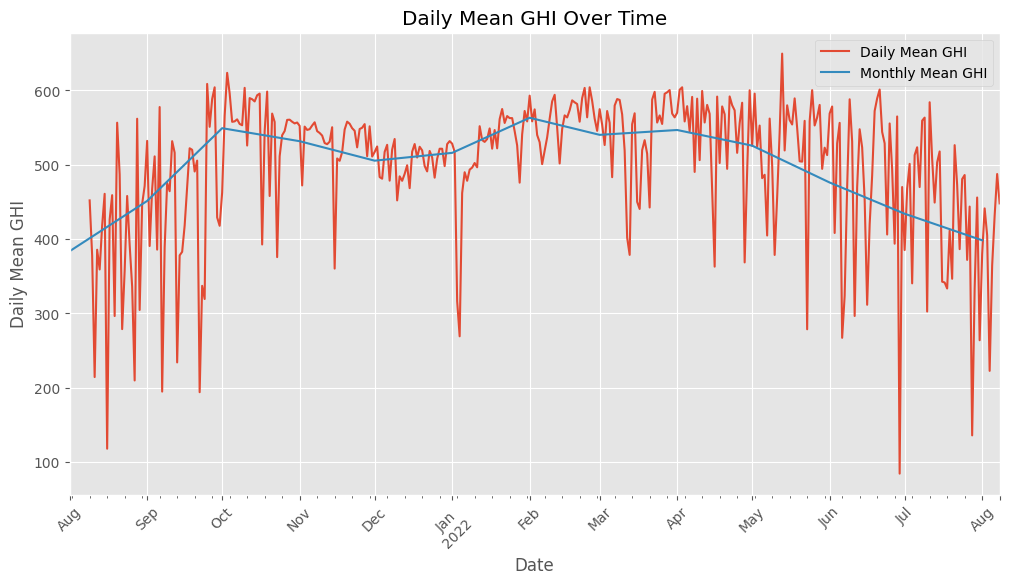

In [39]:
# Calculate daily mean GHI
daily_mean_ghi = df_cleaned['GHI'].resample('D').mean()
monthly_mean_ghi = df_cleaned['GHI'].resample('M').mean()


# Plot daily mean GHI
plt.figure(figsize=(12, 6))
daily_mean_ghi.plot()
monthly_mean_ghi.plot()
plt.title("Daily Mean GHI Over Time")
plt.legend(['Daily Mean GHI', 'Monthly Mean GHI'])
plt.xlabel("Date")
plt.ylabel("Daily Mean GHI")
plt.xticks(rotation=45)
plt.show()

#### GHI Over Time

This block plots the Global Horizontal Irradiance (GHI) over time using a line plot. It helps visualize the temporal trends and variability in solar irradiance throughout the dataset period.

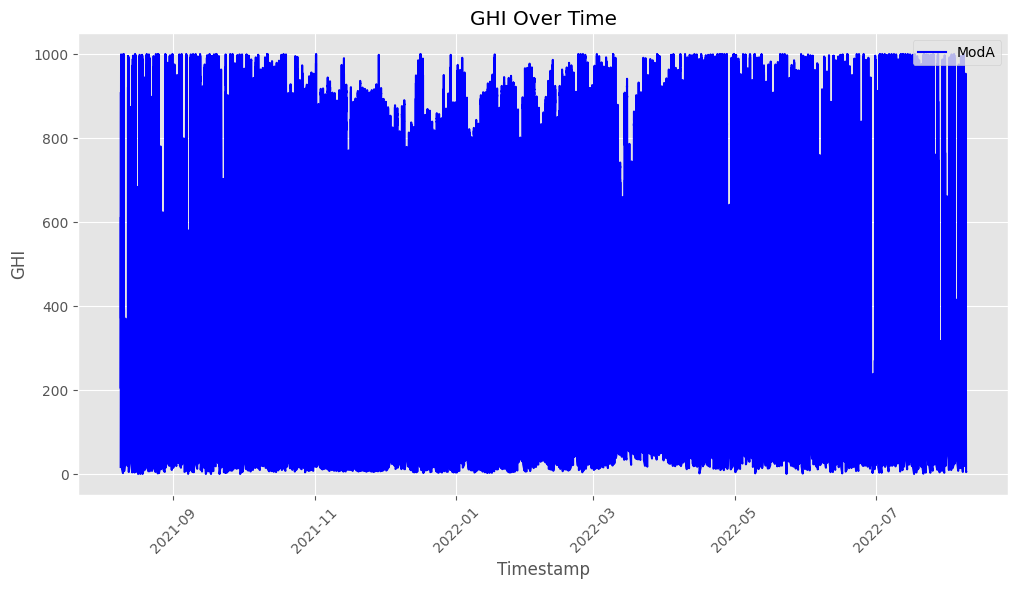

In [11]:

# Plot GHI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['GHI'], label='ModA', color='blue')
plt.title("GHI Over Time")
plt.xticks(rotation=45)
plt.show()

#### DNI Over Time

This block plots the Direct Normal Irradiance (DNI) over time. The line plot allows you to observe how DNI changes across the recorded timestamps, highlighting daily and seasonal patterns.

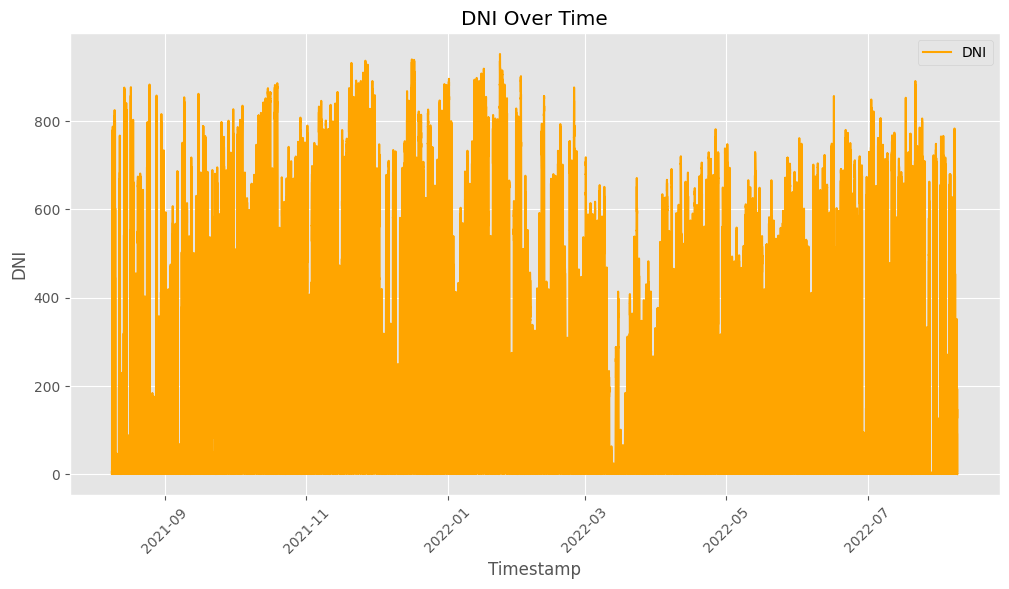

In [12]:
# Plot DNI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['DNI'], label='DNI', color='orange')
plt.title("DNI Over Time")
plt.xticks(rotation=45)
plt.show()

#### DHI Over Time

This block plots the Diffuse Horizontal Irradiance (DHI) over time. The visualization helps in understanding the contribution of diffuse sunlight to the total irradiance.

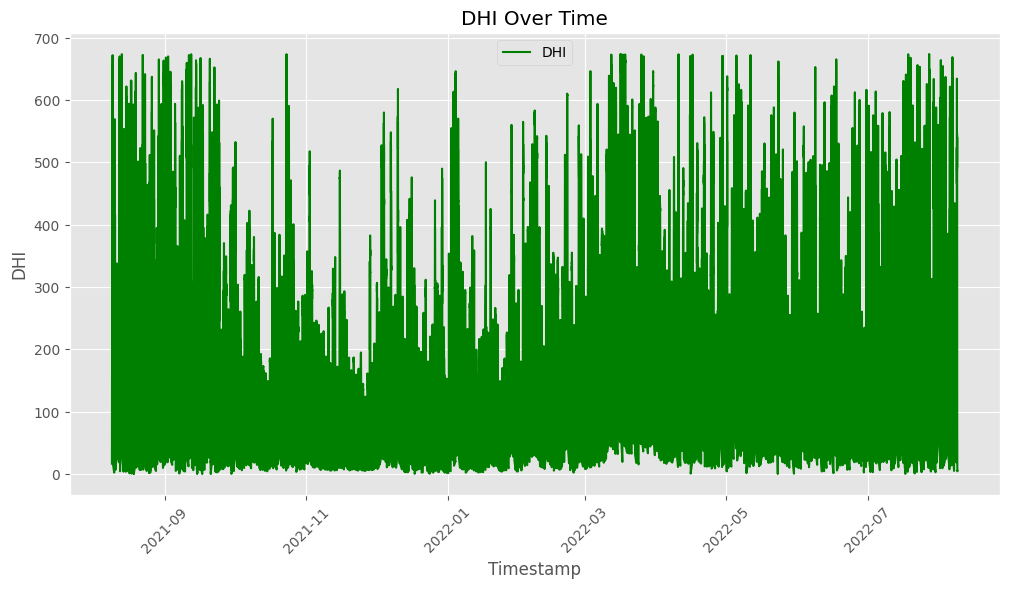

In [13]:
# Plot DHI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['DHI'], label='DHI', color='green')
plt.title("DHI Over Time")
plt.xticks(rotation=45)
plt.show()

#### Tamb Over Time

This block plots the ambient temperature (Tamb) over time. It provides insights into temperature fluctuations and their possible impact on solar panel performance.

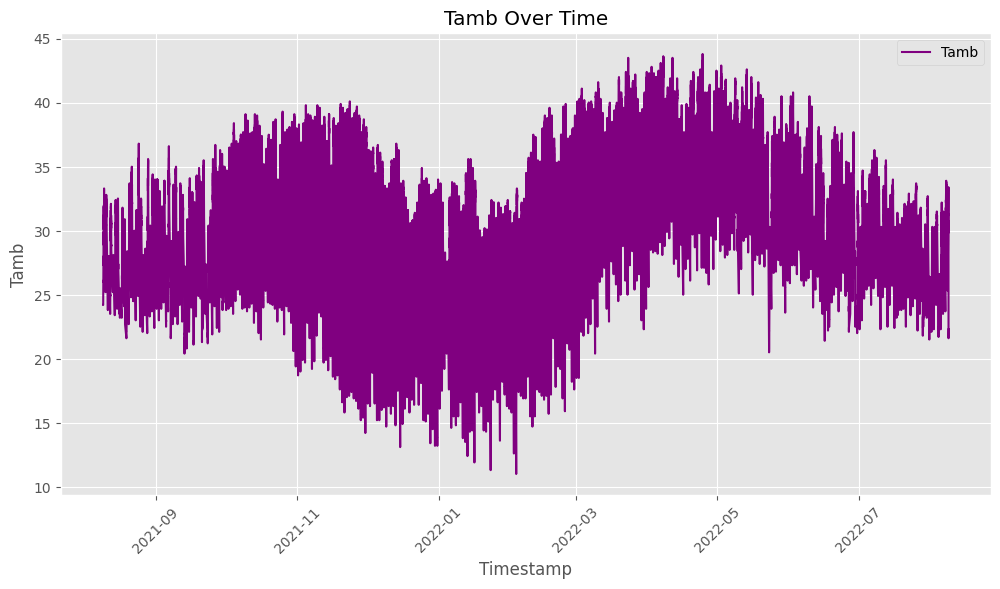

In [14]:
# Plot Tamb  over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['Tamb'], label='Tamb', color='purple')
plt.title("Tamb Over Time")
plt.xticks(rotation=45)
plt.show()

#### Average ModA & ModB Pre/Post Cleaning

This block groups the data by the 'Cleaning' status and calculates the mean values of ModA and ModB before and after cleaning. The resulting bar plot shows the effect of cleaning on module performance.

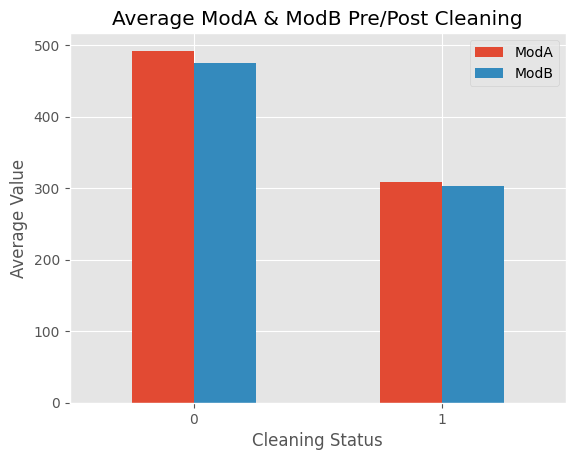

In [15]:
# Group by 'Cleaning' and calculate the mean of ModA and ModB
mod_means = df_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Plot the averages
mod_means.plot(x='Cleaning', y=['ModA', 'ModB'], kind='bar')
plt.title('Average ModA & ModB Pre/Post Cleaning')
plt.ylabel('Average Value')
plt.xlabel('Cleaning Status')
plt.xticks(rotation=0)
plt.show()

#### Correlation Heatmap

This block repeats the correlation heatmap for GHI, DNI, DHI, TModA, and TModB, providing a visual summary of how these variables are interrelated.

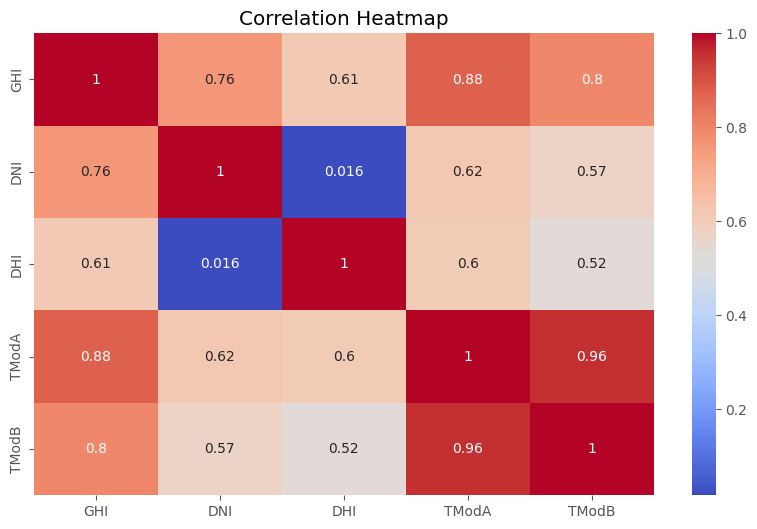

In [16]:
# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### Correlation Heatmap

This block repeats the correlation heatmap for GHI, DNI, DHI, RH, and Tamb, providing a visual summary of how these variables are interrelated.

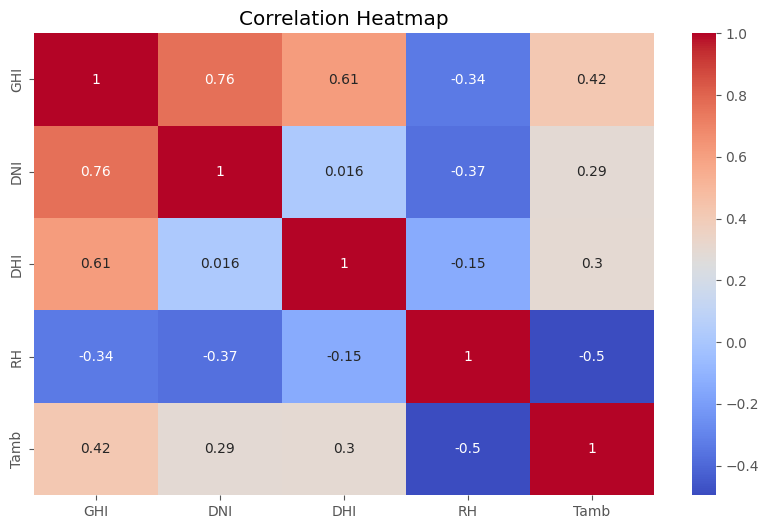

In [17]:
# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[['GHI', 'DNI', 'DHI', 'RH', 'Tamb']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### Correlation Heatmap

This block repeats the correlation heatmap for GHI, DNI, DHI, WS, and WD, providing a visual summary of how these variables are interrelated.

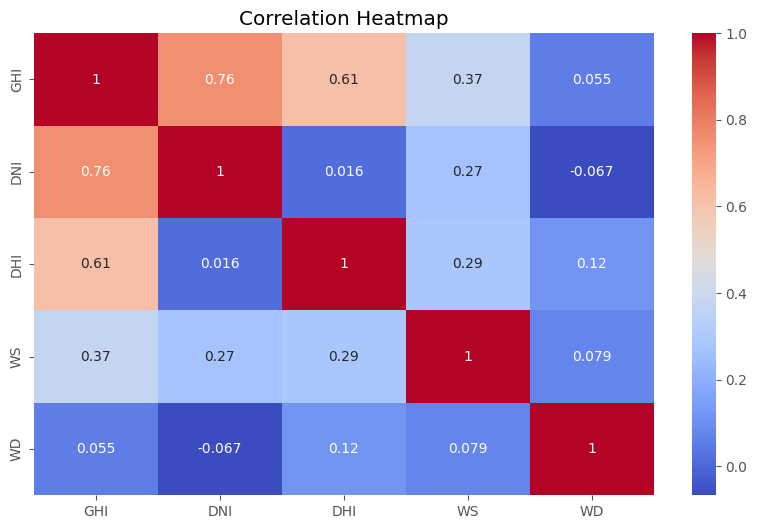

In [24]:
# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[['GHI', 'DNI', 'DHI', 'WS', 'WD']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### Scatter Plots: WS, WSgust, WD vs. GHI

These blocks create scatter plots to explore the relationships between wind speed (WS), wind gust (WSgust), wind direction (WD), and GHI. They help identify if wind conditions have any observable effect on solar irradiance.

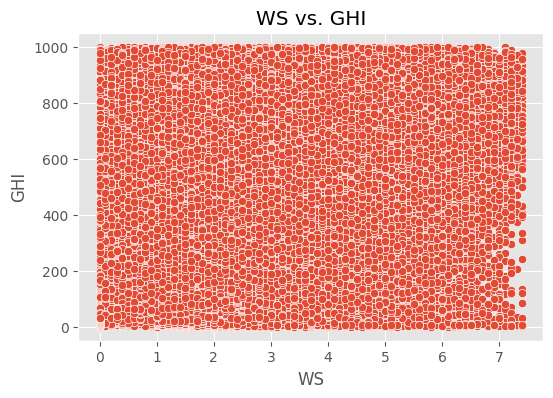

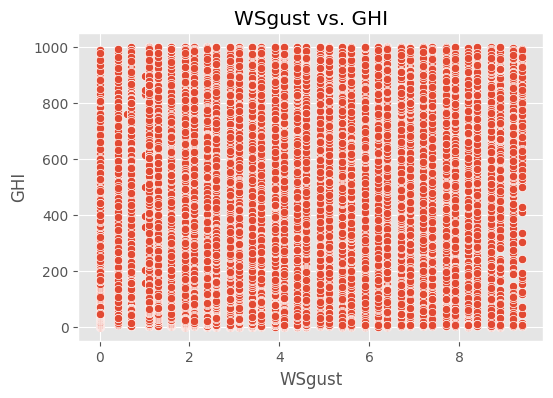

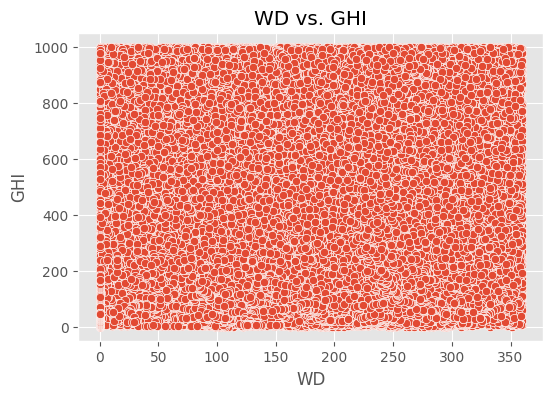

In [18]:
# Scatter plot: WS vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['WS'], y=df_cleaned['GHI'])
plt.title('WS vs. GHI')
plt.xlabel('WS')
plt.ylabel('GHI')
plt.show()

# Scatter plot: WSgust vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['WSgust'], y=df_cleaned['GHI'])
plt.title('WSgust vs. GHI')
plt.xlabel('WSgust')
plt.ylabel('GHI')
plt.show()

# Scatter plot: WD vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['WD'], y=df_cleaned['GHI'])
plt.title('WD vs. GHI')
plt.xlabel('WD')
plt.ylabel('GHI')
plt.show()


#### Scatter Plots: RH vs. Tamb, RH vs. GHi, and Tamb vs. GHI

These blocks generate scatter plots to examine how relative humidity (RH) relates to ambient temperature (Tamb) and GHI. They help assess whether humidity influences temperature readings or solar radiation.

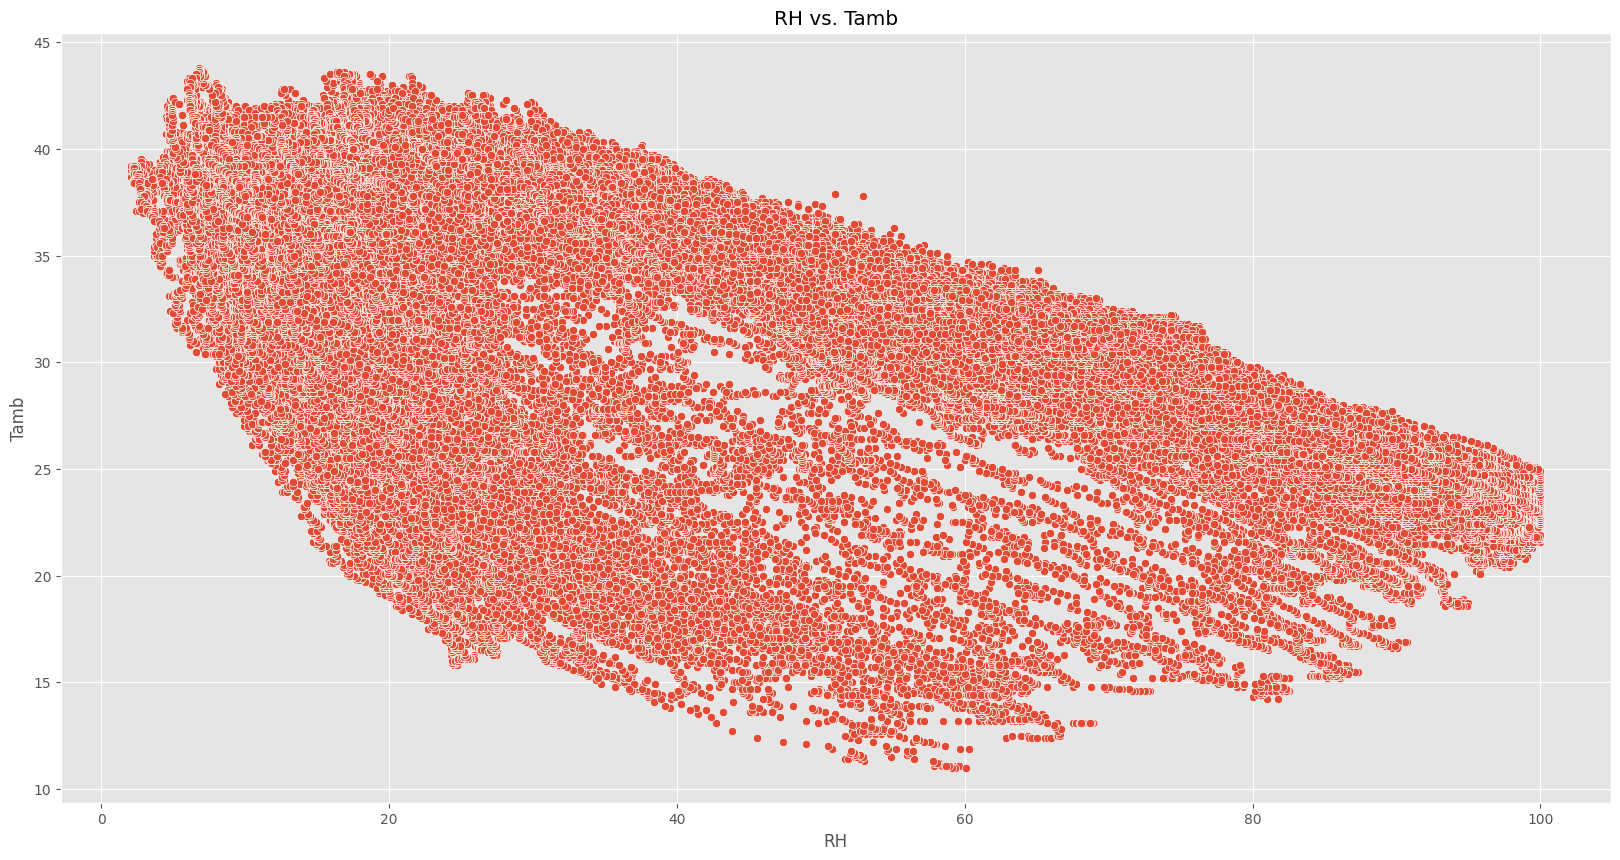

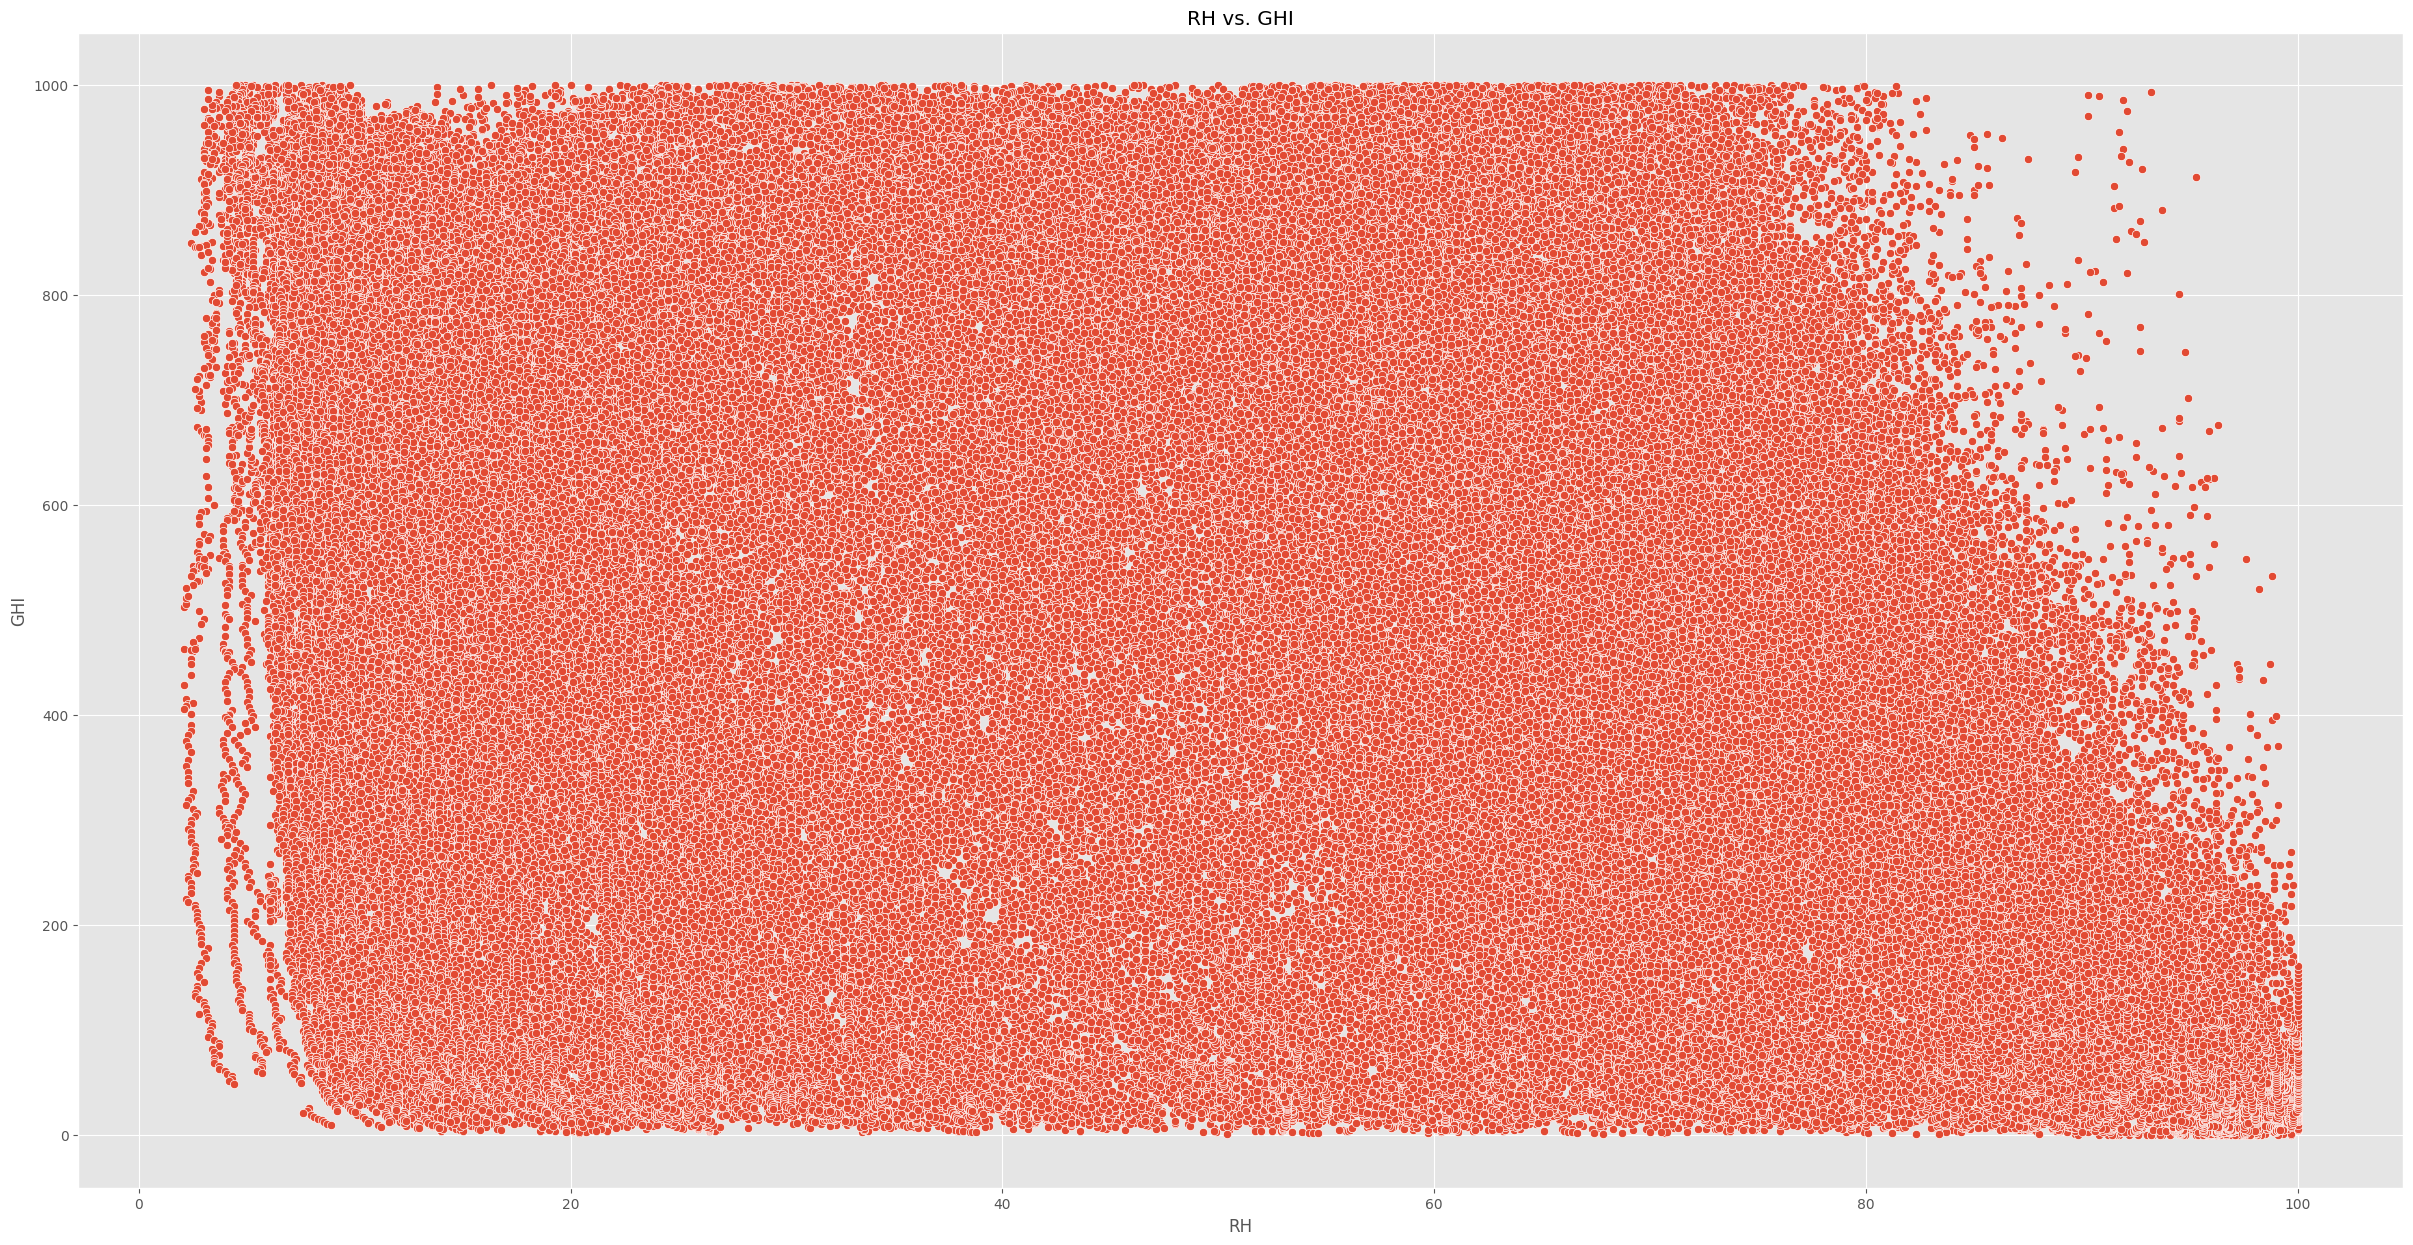

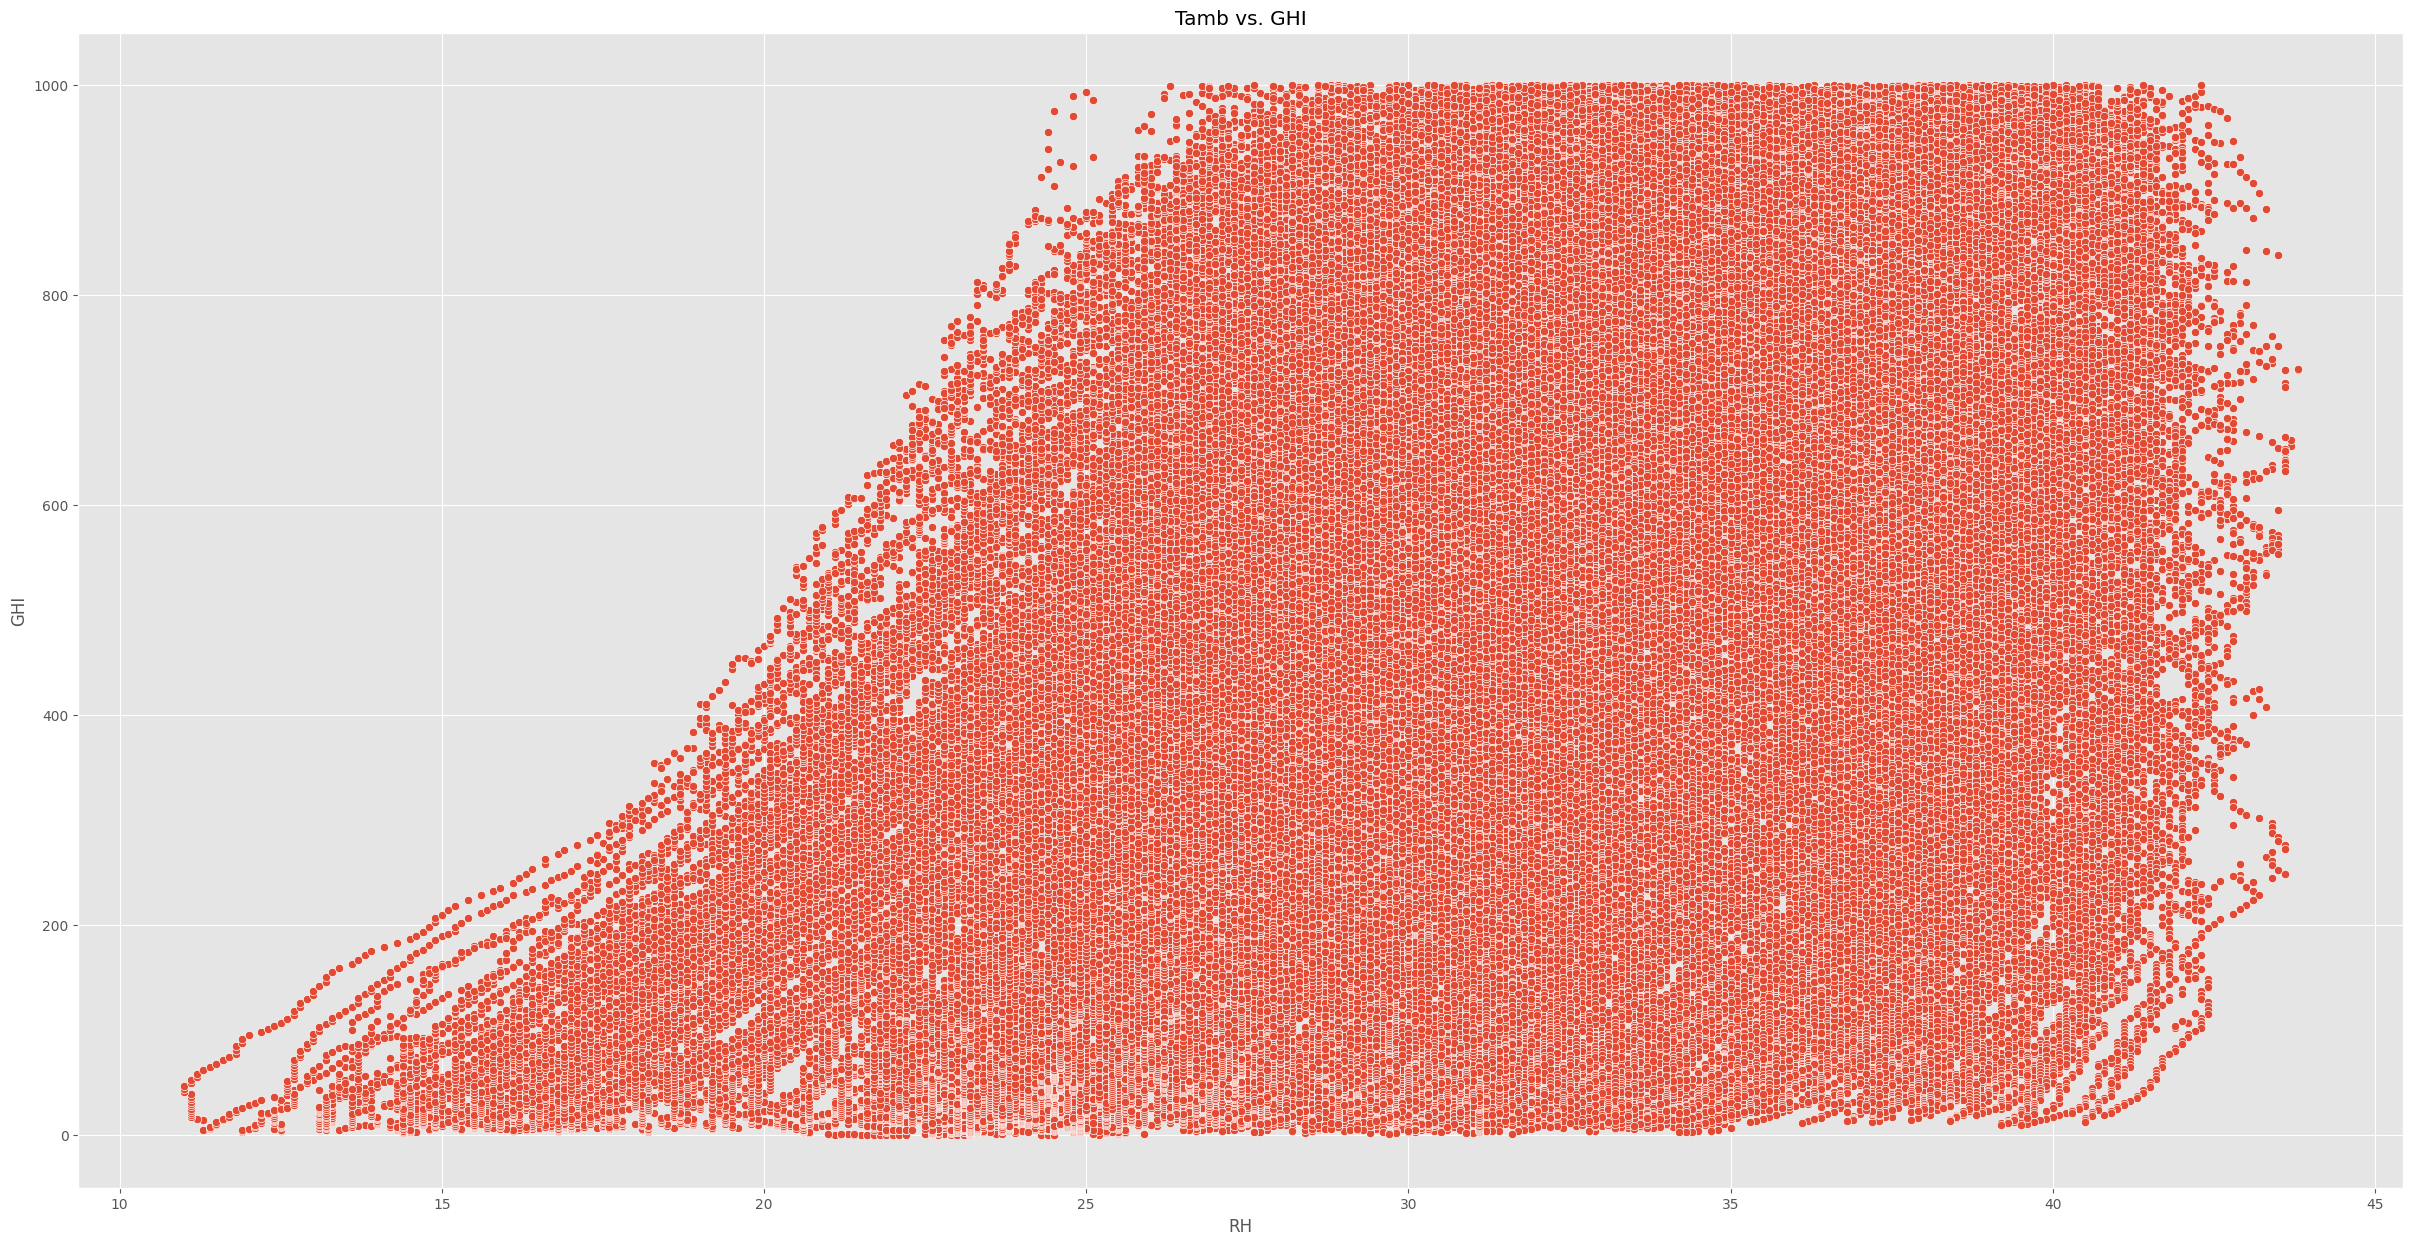

In [ ]:
# Scatter plot: RH vs. Tamb
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df_cleaned['RH'], y=df_cleaned['Tamb'])
plt.title('RH vs. Tamb')
plt.xlabel('RH')
plt.ylabel('Tamb')
plt.show()

# Scatter plot: RH vs. GHI
plt.figure(figsize=(30, 15))
sns.scatterplot(x=df_cleaned['RH'], y=df_cleaned['GHI'])
plt.title('RH vs. GHI')
plt.xlabel('RH')
plt.ylabel('GHI')
plt.show()

# Scatter plot: Tamp vs. GHI
plt.figure(figsize=(30, 15))
sns.scatterplot(x=df_cleaned['Tamb'], y=df_cleaned['GHI'])
plt.title('Tamb vs. GHI')
plt.xlabel('Tamb')
plt.ylabel('GHI')
plt.show()

#### Correlation Coefficients: RH vs. Tamb and RH vs. GHI

This block calculates and prints the correlation coefficients between RH and Tamb, and RH and GHI. These values quantify the strength and direction of the relationships observed in the previous scatter plots.

In [20]:
# Calculate and print correlation coefficients
corr_rh_tamb = df_cleaned['RH'].corr(df_cleaned['Tamb'])
corr_rh_ghi = df_cleaned['RH'].corr(df_cleaned['GHI'])
print(f"Correlation between RH and Tamb: {corr_rh_tamb:.2f}")
print(f"Correlation between RH and GHI: {corr_rh_ghi:.2f}")

Correlation between RH and Tamb: -0.50
Correlation between RH and GHI: -0.34


#### Wind Rose (WS/WD)

This block creates a wind rose plot to visualize the distribution of wind speed and direction. It provides a comprehensive view of wind patterns at the site.

<Figure size 800x800 with 0 Axes>

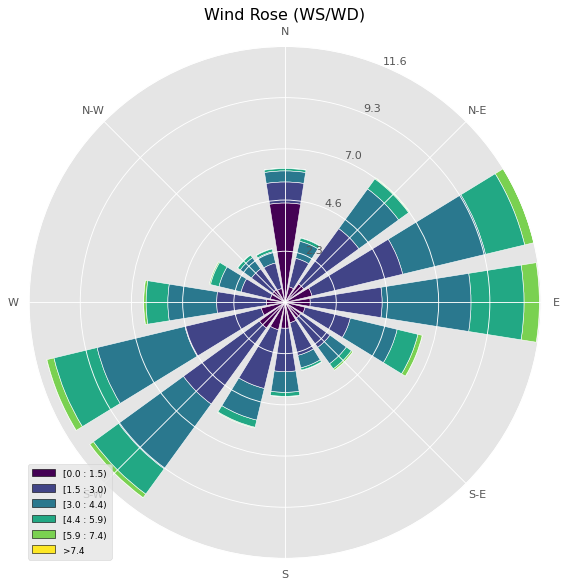

In [21]:
from windrose import WindroseAxes

# Wind rose plot for Wind Speed (WS) and Wind Direction (WD)
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df_cleaned['WD'], df_cleaned['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose (WS/WD)')
ax.set_legend()
plt.show()

#### Histograms: GHI and WS

These blocks plot histograms for GHI and wind speed (WS), showing the frequency distribution of these variables. The histograms help identify typical values and the spread of the data.

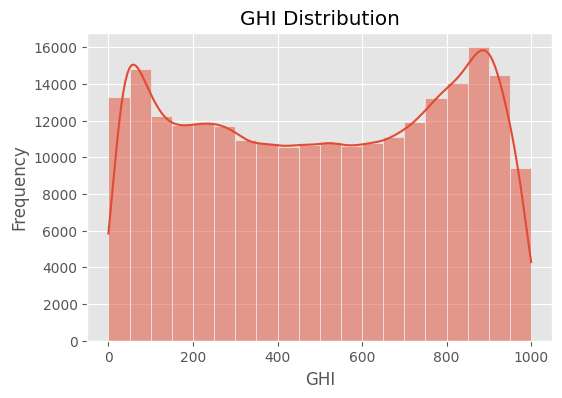

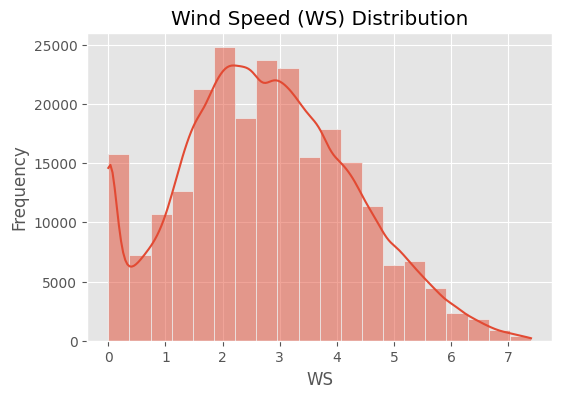

In [22]:
# Histogram for GHI
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['GHI'], bins=20, kde=True)
plt.title("GHI Distribution")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

# Histogram for WS
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['WS'], bins=20, kde=True)
plt.title("Wind Speed (WS) Distribution")
plt.xlabel("WS")
plt.ylabel("Frequency")
plt.show()

#### Bubble Chart: GHI vs. Tamb (Bubble Size = RH)

This block creates a bubble chart where GHI is plotted against Tamb, and the size and color of each bubble represent the relative humidity (RH). This visualization allows for multi-dimensional analysis of how temperature and humidity interact with solar irradiance.

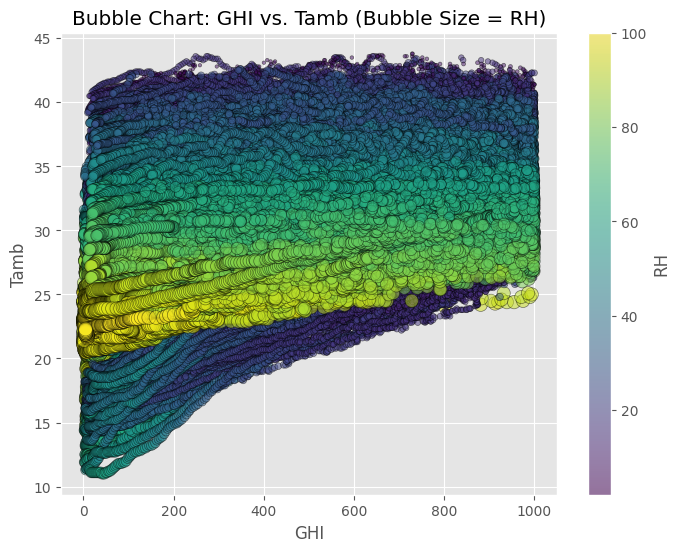

In [23]:
# Bubble chart: GHI vs. Tamb, bubble size = RH
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['GHI'], df_cleaned['Tamb'], 
            s=df_cleaned['RH'],  # Bubble size
            alpha=0.5, c=df_cleaned['RH'], cmap='viridis', edgecolor='k')
plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.colorbar(label='RH')
plt.show()